## Análise de clientes ativos e inativos

Objetivo: Fazer acompanhamento de clientes ativos e inativos por dia

Regras:
 1. Os clientes permanecem ativos em um período de 5 dias após a compra
 2. Depois do período de 5 dias, o cliente se torna inativo


In [73]:
import pandas as pd, matplotlib.pyplot as plt, datetime as dt

In [74]:
df = pd.read_csv(r'C:\Bases_para_estudos\base_clientes_teste.txt', dtype='str')

# Ordenando o dataframe de acordo com o cliente e data de compra
df = df.sort_values(['CLIENTE', 'DATA_DE_COMPRA'])
df

,CLIENTE,DATA_DE_COMPRA
2,1,2023-06-10
0,1,2023-06-15
12,1,2023-06-23
10,1,2023-06-29
9,10,2023-07-08
11,12,2023-07-06
14,15,2023-06-12
15,16,2023-06-29
16,17,2023-07-02
17,18,2023-06-15


In [79]:
data_proxima_compra = []

limite = len(df)
for contxt in range( limite ):
    
    # Pegar o próximo registro em relação ao registro do contexto
    proximo_registro = df.iloc[contxt+1, 1] if contxt+1 < limite and df.iloc[contxt+1, 0] == df.iloc[contxt, 0] else ''
    
    data_proxima_compra.append(proximo_registro)
    
# Pegando a data atual e formatando para o modelo "yyyy-mm-dd"
data_atual = dt.date.today().strftime('%Y-%m-%d')

# Criando colunas de data e transformando as existentes em datetime

# Substituindo valores nulos da lista data_proxima_compra pela data atual e gerando nova coluna no dataframe
df['DATA_PROXIMA_COMPRA'] = pd.to_datetime( [data_atual if v == '' else v for v in data_proxima_compra] )

# Definindo a data limite com base na data de compra
df['DATA_SOMADA_5'] = pd.to_datetime(df['DATA_DE_COMPRA']) + pd.to_timedelta( 5, unit='d')

df['DATA_DE_COMPRA'] = pd.to_datetime( df['DATA_DE_COMPRA'] )

In [80]:
clientes_ativos = []
clientes_inativos = []

calendario = []

# Definindo a data do contexto para iterar os dias até a maior data do conjunto de dados
data_do_contexto = df['DATA_DE_COMPRA'].min()


while data_do_contexto <= df['DATA_SOMADA_5'].max():
    
    # Pegando os registros entre a data de compra e a data somada
    contagem_ativos = df.loc[
        
        (  data_do_contexto >= df['DATA_DE_COMPRA']  ) &
        (  data_do_contexto <= df['DATA_SOMADA_5']  )
    
    ]
    
    # Pegando registros após a data somada e a data de próxima compra
    contagem_inativos = df.loc[
        
        ( data_do_contexto > df['DATA_SOMADA_5'] ) &
        ( data_do_contexto < df['DATA_PROXIMA_COMPRA'] )
        
    ]
    
    # Adicionando as quantidades de clientes retornados às colunas para gerar os gráficos
    clientes_ativos.append( len(contagem_ativos) )
    clientes_inativos.append( len(contagem_inativos) )
    
    calendario.append(  pd.to_datetime(  data_do_contexto  ))
    
    data_do_contexto += pd.to_timedelta( 1 , unit='d')
    
    

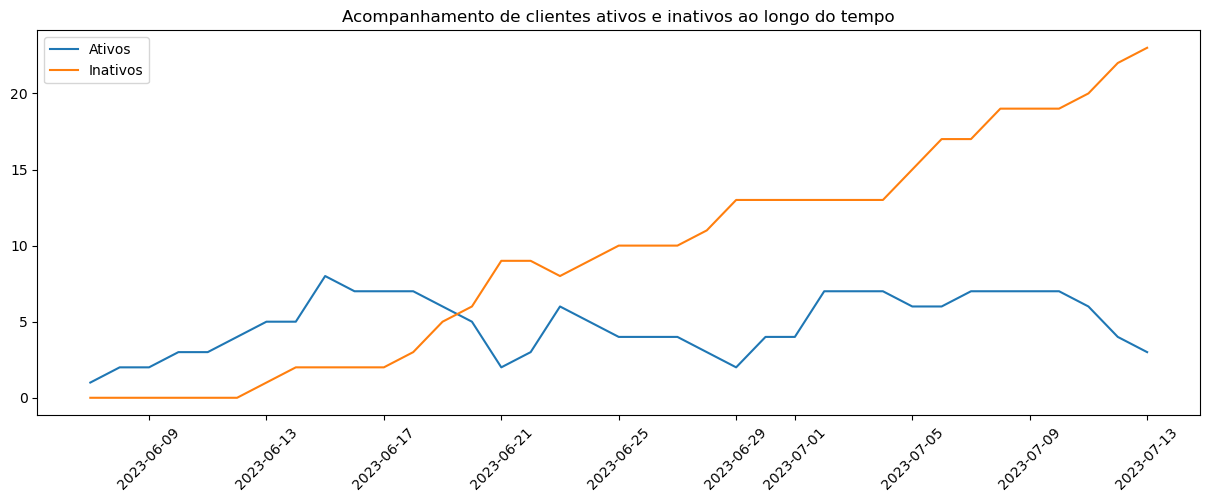

In [87]:
# Criando janela para exibição de gráficos e configurando tamanho
fg = plt.figure( figsize=(15, 5) )

plt.plot( calendario, clientes_ativos , label='Ativos')
plt.plot( calendario, clientes_inativos, label='Inativos')
plt.legend()

plt.title('Acompanhamento de clientes ativos e inativos ao longo do tempo')
plt.xticks(rotation=45)

plt.show()